In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [16]:
print(os.getcwd())
posts_file_path = os.path.join("..", "data", "raw", "The_Donald_weeks_6.json")
print(f"reading file: {posts_file_path}")
posts_df = pd.read_json(posts_file_path)

/Users/christineibaraki/Documents/workspace/RedditQuarantineNLP/core/exploratory_sandbox
reading file: ../data/raw/The_Donald_weeks_6.json


In [17]:
print(len(posts_df))

170500


In [18]:
pd.set_option('display.max_columns', None)
posts_df.head(n=5)

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_template_id,author_flair_text_color,link_flair_template_id,link_flair_text,link_flair_css_class,author_flair_background_color,media,media_embed,secure_media,secure_media_embed,media_metadata,author_cakeday,banned_by,edited,gilded
0,[],0.0,rprobens,None,[],None,text,t2_11al1m,0.0,False,False,1565153903,i.redd.it,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f7h,False,False,False,True,True,False,False,,[],dark,text,False,False,True,4,0,False,no_ads,/r/The_Donald/comments/cn1f7h/i_would_rather_h...,False,image,"{'enabled': True, 'images': [{'id': 'Y9BzcXurs...",0.0,1565153904,64,,True,False,False,The_Donald,t5_38unr,773793,public,https://b.thumbs.redditmedia.com/ARhUY8JcNlFvW...,140.0,140.0,I would rather have a colonoscopy over Beto an...,0,1.565240e+09,https://i.redd.it/48cq484mkye31.jpg,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],0.0,TexasHunter,MURICA,[],AMERICA FIRST,text,t2_cex15,0.0,False,False,1565153882,i.imgur.com,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f3a,False,False,False,False,True,False,False,,[],dark,text,False,False,True,3,0,False,no_ads,/r/The_Donald/comments/cn1f3a/plain_and_simple/,False,image,"{'enabled': True, 'images': [{'id': 'hRtzZcb-Q...",0.0,1565153883,88,,True,False,False,The_Donald,t5_38unr,773793,public,https://b.thumbs.redditmedia.com/449GTdij8Nzhs...,140.0,140.0,Plain and Simple,0,1.565240e+09,https://i.imgur.com/GnoYvP0.jpg,no_ads,0.0,3d907e20-7f98-11e8-bf2e-0e9529ef79a8,dark,c603faee-3105-11e7-a557-0eb24c32e958,♥ 2nd AMENDMENT ♥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],0.0,pilkyton,None,[],None,text,t2_4a13s1mr,0.0,False,False,1565153876,i.redd.it,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f1q,False,False,False,True,True,False,False,,[],dark,text,False,False,True,3,0,False,no_ads,/r/The_Donald/comments/cn1f1q/reddit_bigut_noz...,False,NaN,NaN,0.0,1565153877,2,,True,False,False,The_Donald,t5_38unr,773793,public,default,NaN,NaN,REDDIT = BIGUT NOZIS CONFIRMED. People of all ...,0,1.565240e+09,https://i.redd.it/w5qe3yygkye31.png,no_ads,0.0,NaN,NaN,d02a7e1c-3105-11e7-b0f3-0e033664e418,🐂RidiculousBullshit💩,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],0.0,Bdix23,None,[],None,text,t2_9cvd5,0.0,False,False,1565153872,self.The_Donald,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1f0u,False,False,False,False,True,True,False,,[],dark,text,False,False,True,7,0,False,no_ads,/r/The_Donald/comments/cn1f0u/i_need_your_help...,False,NaN,NaN,0.0,1565153873,20,So a while back I came across a crisis actor v...,True,False,False,The_Donald,t5_38unr,773793,public,self,NaN,NaN,I need your help boys,0,1.565240e+09,https://www.reddit.com/r/The_Donald/comments/c...,no_ads,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],0.0,GoochSpelunker,kekistan,[],KEK,text,t2_16cwjj,0.0,False,False,1565153865,youtu.be,https://www.reddit.com/r/The_Donald/comments/c...,{},cn1ezq,False,False,False,False,True,False,False,,[],dark,text,False,False,True,8,0,False,no_ads,/r/The_Donald/comments/cn1ezq/awkward_referenc...,False,NaN,NaN,0.0,1565153865,20,,True,False,False,The_Donald,t5_38unr,773793,public,default,NaN,NaN,Awkward reference to Q on Jimmy Fallon last ni..

In [19]:
posts_df['created_date'] = pd.to_datetime(
    posts_df['created_utc'].apply(
        lambda x: None if np.isnan(x) else datetime.fromtimestamp(x)),
    errors='coerce')

posts_df['created_date'] = posts_df['created_date'].dt.date

In [20]:
print(posts_df.created_date.min())
print(posts_df.created_date.max())

2019-05-14
2019-08-06


In [21]:
posts_df.set_index('created_date', inplace=True)

In [25]:
posts_by_date = posts_df.groupby(posts_df.index).size().to_frame('num_posts')
posts_by_date.reset_index(inplace=True)

In [26]:
# subset_posts = posts_by_date[posts_by_date['created_date'] > datetime.strptime('2018-08-01', "%Y-%m-%d").date()]
# subset_posts = subset_posts[subset_posts['created_date'] < datetime.strptime('2019-03-01', "%Y-%m-%d").date()]

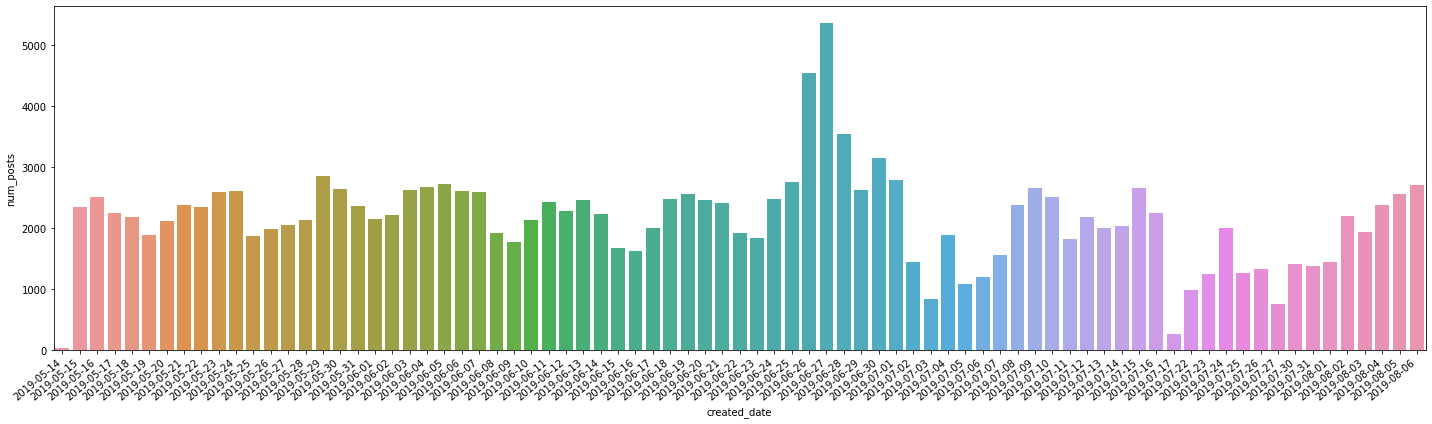

In [28]:
plt.figure(figsize=(20,6))
ax = sns.barplot(x='created_date', y="num_posts", data=posts_by_date)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [149]:
# posts_df[posts_df.index == datetime.strptime('2018-09-30', "%Y-%m-%d").date()].sort_values('created_utc')

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,steward_reports,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,updated_utc,url,whitelist_status,wls,author_flair_background_color,author_flair_text_color,thumbnail_height,thumbnail_width,media,media_embed,post_hint,preview,secure_media,secure_media_embed,banned_by,author_cakeday,edited,media_metadata,author_created_utc,author_flair_template_id,category,content_categories,gilded,removal_reason,suggested_sort,archived,can_gild,distinguished,hidden,quarantine,subreddit_name_prefixed,crosspost_parent,crosspost_parent_list,author_premium,treatment_tags,upvote_ratio
created_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-30,NaN,NaN,lapeparoja,None,[],None,text,t2_14sxn6,0.0,NaN,False,False,1538283654,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3oh2,False,False,False,False,0.0,True,False,,None,[],None,None,dark,text,False,False,True,0,0,False,no_ads,/r/TheRedPill/comments/9k3oh2/how_to_succeed_w...,False,0.0,1543815846,1,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,How to Succeed with Brunettes,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,1.538284e+09,NaN,1.485458e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,aquickquestionplzthx,None,[],None,text,t2_1u5zyidb,0.0,NaN,False,False,1538283867,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3ph4,False,False,False,False,0.0,True,False,,unflaired,[],None,None,dark,text,False,False,True,1,0,False,no_ads,/r/TheRedPill/comments/9k3ph4/fair_process_tur...,False,0.0,1543815858,0,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,Fair Process turns into Kangeroo Court - Why e...,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,NaN,NaN,1.532356e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,VolatileEnemy,None,[],None,text,t2_1gh68027,0.0,NaN,False,False,1538285941,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k3xln,False,False,False,False,0.0,True,False,,meta,"[{'e': 'text', 't': 'Meta'}]",4adbe832-90b3-11e2-aa77-12313d18803b,Meta,dark,richtext,False,False,False,23,0,False,no_ads,/r/TheRedPill/comments/9k3xln/i_dont_care_who_...,False,0.0,1543815960,5,[removed],True,False,NaN,False,TheRedPill,t5_2ve1u,0,public,default,I don't care who it offends I'm still going to...,NaN,NaN,https://www.reddit.com/r/TheRedPill/comments/9...,no_ads,0.0,None,None,NaN,NaN,None,{},NaN,NaN,None,{},NaN,NaN,1.538286e+09,NaN,1.527460e+09,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,r/TheRedPill,NaN,NaN,NaN,NaN,NaN
2018-09-30,NaN,NaN,CasaDeFranco,points,"[{'e': 'text', 't': '2'}]",2,richtext,t2_pqn9b67,0.0,NaN,False,False,1538289193,self.TheRedPill,https://www.reddit.com/r/TheRedPill/comments/9...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}",9k48eo,False,False,False,False,1.0,True,False,,unflaired,[],None,None,dark,text,False,False,False,26,0,False,no_ads,/r/TheRedPill/comments/9k48eo/the_allegory_of_...,False,0.0,1543

In [150]:
# posts_930 = posts_df[posts_df.index == datetime.strptime('2018-09-30', "%Y-%m-%d").date()].sort_values('created_utc')